In [3]:

from collections import defaultdict
from dimod import SimulatedAnnealingSampler
import numpy as np
import matplotlib.pyplot as plt

# Parameters

def basic_cosine_sample(x):
    factor = 2
    return np.cos(factor*2*np.pi*x)**8


def f(x):
    beta = np.sqrt(10**3)
    coeff = 0.999999999999963
    return 1 + 1/2*((coeff-1)*np.exp(beta * x) -(coeff+1)*np.exp(-beta * x))


def second_derivative(x):
    beta = np.sqrt(10**3)
    coeff = 0.999999999999963
    return (beta**2) / 2 * ((coeff - 1) * np.exp(beta * x) - (coeff + 1) * np.exp(-beta * x))

# Function definitions
def func(x_in):
    res = np.empty((0, 0))
    for x in x_in:
        res = np.append(res, f(x))
             
    return res


num_qubits = 51
# Initial uniform mesh
x_initial = np.linspace(0, 1, 21)
x_tot = np.linspace(0, 1,num_qubits)
y_initial = func(x_initial)
y_exact = func(x_tot)


# Initialize our Q matrix
Q = defaultdict(int)

F=21
beta = 1
alpha = 1
#Define the Q matrix
for i in range(num_qubits):
    Q[(i,i)] = -100/1000*abs(second_derivative(x_tot[i]))-1*abs(basic_cosine_sample(x_tot[i]))+beta*(1-2*F)
    # if i == 0 or i == 49:
    #     Q[(i,i)] = Q[(i,i)]-40
    for j in range(i+1,num_qubits): # j>i
            Q[(i,j)] = 2*beta #+ alpha*1/abs(x_tot[i]-x_tot[j])/25

print(Q)


# Define the sampler that will be used to run the problem
#sampler = EmbeddingComposite(DWaveSampler())
# Instantiate the sampler
sampler = SimulatedAnnealingSampler()

# Run the problem on the sampler and print the results
sampleset = sampler.sample_qubo(Q,
                                 num_reads = 100)
#print(sampleset) #prints energy, number of occurencies and 
result = sampleset.first.sample #lowest energy sample

#print(first)
#for k in range(9):
    #print(result[k])
x_adapt = np.empty((0, 0))

for k in range(num_qubits):
    if result[k] == 1:
        x_adapt = np.append(x_adapt, x_tot[k])


y_adaptive = func(x_adapt)


defaultdict(<class 'int'>, {(0, 0): np.float64(-142.0), (0, 1): 2, (0, 2): 2, (0, 3): 2, (0, 4): 2, (0, 5): 2, (0, 6): 2, (0, 7): 2, (0, 8): 2, (0, 9): 2, (0, 10): 2, (0, 11): 2, (0, 12): 2, (0, 13): 2, (0, 14): 2, (0, 15): 2, (0, 16): 2, (0, 17): 2, (0, 18): 2, (0, 19): 2, (0, 20): 2, (0, 21): 2, (0, 22): 2, (0, 23): 2, (0, 24): 2, (0, 25): 2, (0, 26): 2, (0, 27): 2, (0, 28): 2, (0, 29): 2, (0, 30): 2, (0, 31): 2, (0, 32): 2, (0, 33): 2, (0, 34): 2, (0, 35): 2, (0, 36): 2, (0, 37): 2, (0, 38): 2, (0, 39): 2, (0, 40): 2, (0, 41): 2, (0, 42): 2, (0, 43): 2, (0, 44): 2, (0, 45): 2, (0, 46): 2, (0, 47): 2, (0, 48): 2, (0, 49): 2, (0, 50): 2, (1, 1): np.float64(-95.00869260269359), (1, 2): 2, (1, 3): 2, (1, 4): 2, (1, 5): 2, (1, 6): 2, (1, 7): 2, (1, 8): 2, (1, 9): 2, (1, 10): 2, (1, 11): 2, (1, 12): 2, (1, 13): 2, (1, 14): 2, (1, 15): 2, (1, 16): 2, (1, 17): 2, (1, 18): 2, (1, 19): 2, (1, 20): 2, (1, 21): 2, (1, 22): 2, (1, 23): 2, (1, 24): 2, (1, 25): 2, (1, 26): 2, (1, 27): 2, (1, 28): 

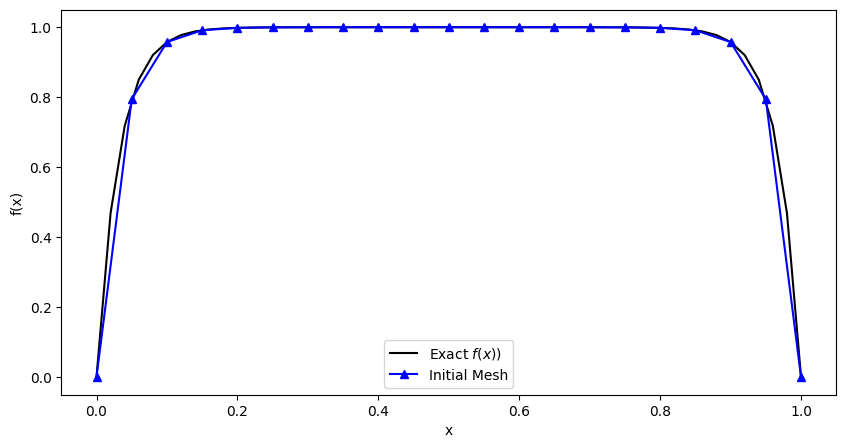

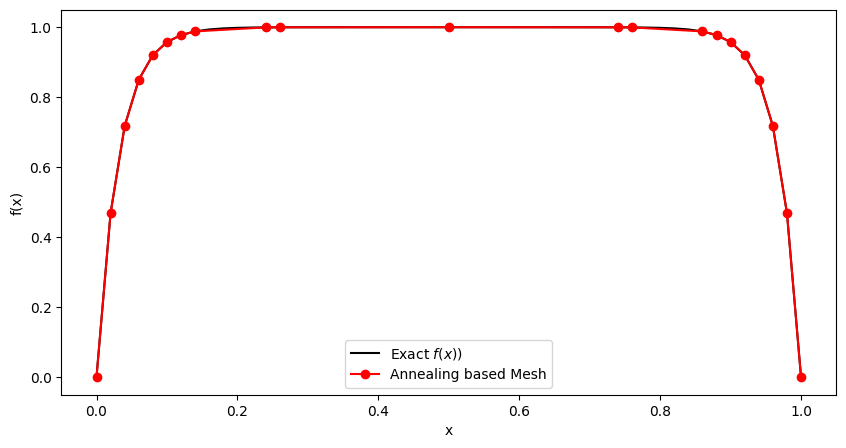

In [4]:



# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(x_tot, y_exact, 'k-', label="Exact $f(x))$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.figure(figsize=(10, 5))
plt.plot(x_tot, y_exact, 'k-', label="Exact $f(x))$")
plt.plot(x_adapt, y_adaptive, 'ro-', label="Annealing based Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

